## Multiple Linear Regression

The statistical method that extends the simple linear regression model linear relationship between each independent variable and the dependent variable.

Multiple regression is one of the most commonly used data analysis methods, and this inferential method also serves as a building block for some advanced analytics methods. The independence of the independent variables used is most important because an independent variable that can predict another independent variable can complicate the understanding of a multiple regression model.

In a multiple regression model, each independent variable is represented by a subscripted X, such as X1 or X2. For a model with the two independent variables, X1 and X2, the general form of the multiple regression equation is:

$$Y = \beta0 + \beta_1X_1 + \beta_2X_2 + ε$$

I will refrain from going into the details of the mathematics of multiple linear regression, since I do not (yet) have the necessary linear algebra knowledge to fully understand it.

Keep in mind that *it is not possible to break the process into steps without prior linear algebra knowledge*, therefore I'll go straight to the implementation of multiple linear regression in Python.

### Multiple Linear Regression in Python

Train a model to assess into which companies to invest to achieve the goal of maximizing profit, using the 50_Startups dataset. 

The dataset contains five columns: R&D Spend, Administration Spend, Marketing Spend, State, and Profit.

Let's start to work on the parts of the equation that don't require any linear algebra knowledge:

1. $y$ = Profit: the *dependent variable* (the main factor we're trying to understand or predict)
2. $x_1$ = R&D Spend: the first independent variable 
3. $x_2$ = Admin: the second independent variable
4. $x_3$ = Marketing Spend: the third independent variable

The *State* column in the dataset contains categorical data, so we need to encode it using dummy variables.


### Dummy Variables

The obvious problem with wanting to use categorical variables as predictors is that often you’ll have more than two categories.

In these cases we can use what we call *dummy variables*. 

To do it, we have to create several variables; in fact, the number of variables we need is *one less than the number of groups we’re recoding*. The explanation is in the next section (Dummy Variable Trap)

Pandas has a function called `get_dummies` that will do this for us, but here's the theory behind it:

1. Count the number of groups you want to recode and subtract 1.
2. Create as many new variables as the value you calculated in step 1. These are your
dummy variables.
3. Choose one of your groups as a baseline (i.e., a group against which all other groups
should be compared). This should usually be a control group, or, if you don’t have
a specific hypothesis, it should be the group that has the most observations
(because it might be interesting to compare other groups against the majority).
4. Having chosen a baseline group, assign that group values of 0 for all of your dummy
variables.
5. For your first dummy variable, assign the value 1 to the first group that you want to
compare against the baseline group. Assign all other groups 0 for this variable.
6. For the second dummy variable assign the value 1 to the second group that you want
to compare against the baseline group. Assign all other groups 0 for this variable.
7. Repeat this until you run out of dummy variables.
8. Place all of your dummy variables into the regression analysis!


#### Dummy Variable Trap

The Dummy Variable Trap occurs when two or more dummy variables created by one-hot encoding are highly correlated (multi-collinear). This means that one variable can be predicted from the others, making it difficult to interpret predicted coefficient variables in regression models. In other words, the individual effect of the dummy variables on the prediction model can not be interpreted well because of multicollinearity.

**Note**: sklearn's takes care of this issue for us, but it's important to know that it exists.


## Building the Model

### Subset Selection


On the theoretical side, there is so much to add that it would clutter the notebook.

I've added a specific appendix: [Subset Selection](999-Y-subset-selection-theory.ipynb) to explain the concept in detail.

**Important**: note that `sklearn` takes care of finding the best features for us. This is just to know what's happening under the hood.

I'll keep it practical here.

Simply put: as the number of predictors increases, it becomes important to evaluate which independent variables to keep and which ones to discard.

For two main reasons:

1. Garbage in, garbage out: the more irrelevant variables we include, the more noise from irrelevant data we add to our model/analysis.
2. It will become increasingly difficult to interpret the results and explain them to others. 

That being said, there are five main methods to select the right independent variables:

1. "All-in"
2. Backward Elimination
3. Forward Selection
4. Bidirectional Elimination
5. Score Comparison

Backward Elimination, Forward Selection and Bidirectional Elimination are *stepwise regression methods*. 

Commonly, it is implied that Bidirectional Elimination is the method used when we simply say "Stepwise Regression".

The reasons to go "all-in" are:
- Prior knowledge
- You have to (for example, in a Kaggle competition or because your boss said so)
- Preparing for Backward Elimination

#### Backward Elimination

1. Select a significance level to stay in the model (e.g. $\alpha$ = 0.05)
2. Fit the full model with all possible predictors
3. Consider the predictor with the *highest* $p$-value. If $p > \alpha$ go to step 4, otherwise go to END
4. Remove the predictor
5. Fit the model without this predictor
6. Go to step 3

END: the model is ready

This is the fastest method.

#### Forward Selection

1. Select a significance level to enter the model (e.g. $\alpha$ = 0.05)
2. Fit all simple regression models $y \sim x_n$ and select the one with the lowest $p$-value
3. Keep this variable and fit all possible models with one extra predictor added to the one(s) you already have
4. Consider the predictor with the *lowest* $p$-value. If $p < \alpha$ go to step 3, otherwise go to END

END: keep the *previous* model

#### Bidirectional Elimination

1. Select a significance level to enter and to stay in the model (e.g. $\alpha_{enter} = 0.05$ and $\alpha_{stay} = 0.05$)
2. Perform the next step of Forward Selection (new variables must have $p < \alpha_{enter}$ to enter)
3. Perform ALL steps of Backward Elimination (old variables must have $p < \alpha_{stay}$ to stay)
4. Repeat step 2 and 3 until no new variables can enter and no old variables can exit

END: the model is ready

#### Score Comparison

1. Select a criterion of goodness of fit
2. Construct all possible regression models: $2^N - 1$ total combinations
3. Select the model with the score that best fits the criterion

END: the model is ready

The issue with this method is that the number of possible models grows exponentially with the number of predictors, making it computationally expensive.

## Practical Example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('./data/50_Startups.csv')
dataset.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
# checking for missing data and data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [7]:
# Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# 3 is the index of the column we want to encode
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [8]:
# checking the encoded values
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [9]:
# splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
# training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
# predicting the Test set results
y_pred = regressor.predict(X_test)
# print only two decimal places
np.set_printoptions(precision=2)
# compare the predicted values with the real values and print them vertically
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


### Predicting the results of the Test set by specifying the values of the independent variables

Making a single prediction, for example: 
1.  the profit of a startup 
2. with R&D Spend = 160000, 
3. Administration Spend = 130000, 
4. Marketing Spend = 300000
5. and State = 'California')

In [15]:
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))

[181566.92]


Therefore, our model predicts that the profit of a Californian startup which spent 160000 in R&D, 130000 in Administration and 300000 in Marketing is $ 181566,92.

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$1, 0, 0, 160000, 130000, 300000 \rightarrow \textrm{scalars}$

$[1, 0, 0, 160000, 130000, 300000] \rightarrow \textrm{1D array}$

$[[1, 0, 0, 160000, 130000, 300000]] \rightarrow \textrm{2D array}$

**Important note 2:** Notice also that the "California" state was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the second row of the matrix of features X, "California" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, not the last three ones, because the dummy variables are always created in the first columns.

Getting the final linear regression equation with the values of the coefficients

In [16]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.5292485298


Therefore, the equation of our multiple linear regression model is:

$$Profit = 86.6 \times Dummy State 1 - 873 \times Dummy State 2 + 786 \times Dummy State 3 + 0.773 \times R\&D Spend + 0.0329 \times Administration + 0.0366 \times Marketing Spend + 42467.53$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.

### Example 2

In [2]:
df = pd.read_csv('../project/data/USA_Housing.csv')
# checking for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [3]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

An extra step that could be done to visually check the data distribution would be to use `sns.pairplot(df)`. In this case, I'll skip as the image would clutter the notebook.

We can check the distribution of our target variable:

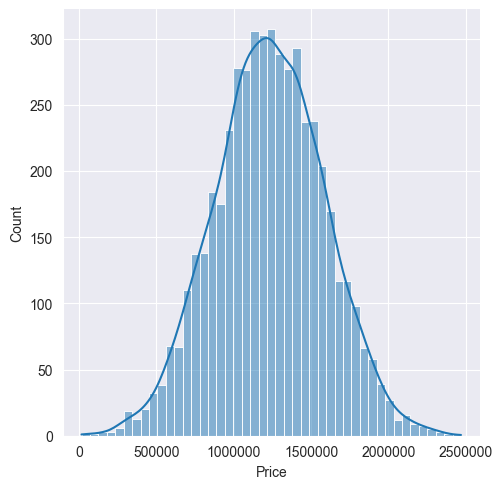

In [4]:
sns.displot(df['Price'], kde=True)
plt.ticklabel_format(style='plain')

Let's check the correlation between the features.

The 'Address' column is a string and needs to be excluded from the correlation matrix. In this case, it's easier to use `.iloc` to select the columns ('Address' is the last one, making it easy to locate).

I'll store the correlation matrix in a variable `df_num` for future use.

In [5]:
df_num = df.iloc[:,:-1].corr()
df_num

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


The `heatmap` function from `seaborn` is a great way to visualize the correlation matrix.

<Axes: >

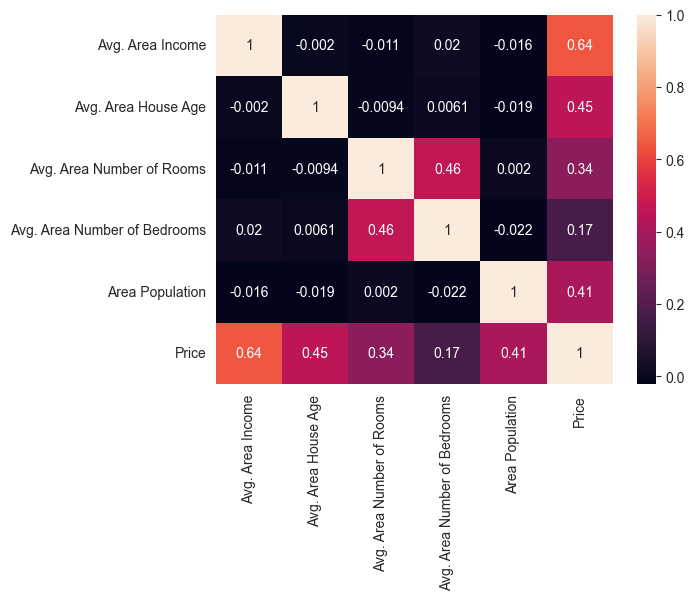

In [6]:
sns.heatmap(df_num, annot=True)


Let's prepare the model:

In [7]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

`test_size` is set to 0.4, meaning that 40% of the data will be allocated to the test set.

`random_state` controls the random number generator used to shuffle the data before splitting it. It ensures that the same randomization is used each time you run the code, resulting in the same splits of the data.

Popular integer random seeds are 0 and 42. 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Here's how we can calculate the intercept and coefficients of the model:

In [10]:
lm.intercept_

np.float64(-2640159.7968526953)

In [11]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80**.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15**.



In [12]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


### Predictions

In [13]:
predictions = lm.predict(X_test)

In [15]:
predictions

array([1260960.70567627,  827588.75560329, 1742421.24254344, ...,
        372191.40626917, 1365217.15140898, 1914519.5417888 ],
      shape=(2000,))

Let's visualize the predictions vs. the real values: if the model fits the data well, the points should be close to a diagonal line.

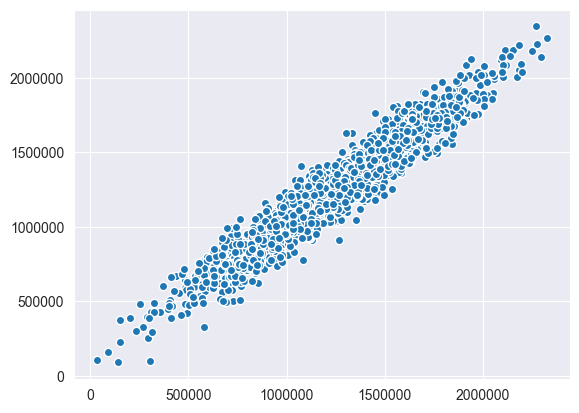

In [14]:
plt.ticklabel_format(style='plain')
plt.scatter(y_test, predictions, edgecolors='w')

Now let's check the residuals: the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual.

If the model is good, the residuals should be normally distributed around zero.

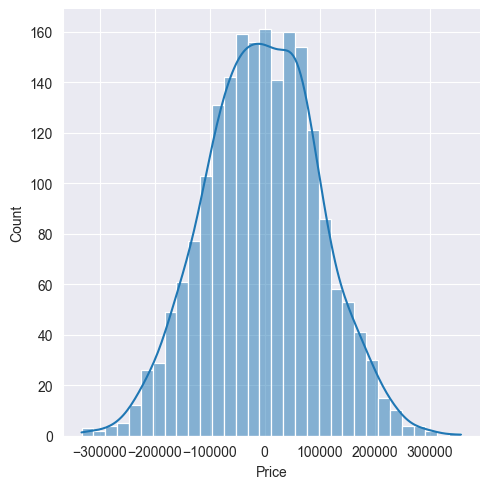

In [17]:
sns.displot((y_test-predictions), kde=True)

Using loss functions to evaluate the model, we can see how much off the predictions are from the real values.

The returned values are the units of the target variable, which in this case is the price of the houses:

In [42]:
def model_error_evaluation():    
    from sklearn import metrics
    sse = np.sum((y_test - predictions)**2)
    mae = metrics.mean_absolute_error(y_test, predictions)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
    print('SSE', round(sse, 3))
    print('MAE', round(mae, 3))
    print('MSE', round(mse, 3))
    print('RMSE', round(rmse, 3))
model_error_evaluation()

SSE 20921917814417.96
MAE 82288.223
MSE 10460958907.209
RMSE 102278.829
